<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Week-2-IP/blob/main/Financial_Inclusion_in_East_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Financial Inclusion in East Africa

## 1. Defining the Question

### a) Question Specification

Which individuals are most likely to have or user a bank account?

### b) Metric for Success

Identifying and predicting the individuals who are most likely to have or use a bank account.

### c) Analysis context

* The analysis is based on East African countries, and aims to study the financial inclusion in the region. The main indicator will be the access to bank accounts.
* The accuracy might not be excellent as it depends on how well the data was collected, and how much the variables answer our question.



### d) Experimental Design

The following list depicts the steps taken to answer the analysis question.
1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Follow up questions.


### e) Data Relevance

* The data should have variables that adequately contribute to answering the target question.
* The dataset should lead to high prediction accuracy when trained on the model.

## 2. Importing the Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk
from scipy import stats
import os
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Dataset

In [ ]:
# Mounting Google Drive to allow for easy acces to the database table 
%cd ..
from google.colab import drive
drive.mount('/content/drive')

# Acessing the required Google Drive directory
os.chdir("/content/drive/MyDrive/Core/Moringa Core Week 2 IP")

# Dataset Loading
financial_inclusion = pd.read_csv('Financial Dataset - 1.csv')

/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 4. Data Understanding

Number of records.

In [ ]:
print(f'The dataset has {financial_inclusion.shape[0]} records, and {financial_inclusion.shape[1]} columns.')

The dataset has 23524 records, and 13 columns.


Dataset Preview.

In [ ]:
financial_inclusion.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
financial_inclusion.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


Dataset information summary.

In [ ]:
financial_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The columns have the correct data types.

## 5. External Data Source Validation

1. The CBK in 2019 on the Kenya's financial inclusion [link](https://www.centralbank.go.ke/uploads/financial_inclusion/2050404730_FinAccess%202019%20Household%20Survey-%20Jun.%2014%20Version.pdf).
2. The Nation Institute of Statistics in Rwanda [link](http://www.statistics.gov.rw/publication/finscope-rwanda-2016).
3. The Financial Sector Deepening Trust in Tanzania [link](https://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf).
4. The World Bank Ugandan Financial Access Progress [link](https://ufa.worldbank.org/en/country-progress/uganda). 

* The studies above also focus on the dataset variables, and from the dataset preview, the data is close to those depicted in the studies.
* Furthermore, after analyzing the data, the findings are similar to those found in the study, this further proves the validity of the dataset.

## 6. Data Preperation

### a) Validation

In [ ]:
# The uniqueid column is irrelevant to the experiment, and needs to removed.
financial_inclusion.drop('uniqueid', axis = 1, inplace = True)

### b) Completeness

**Dropping Values**

In [ ]:
# Checking for the presence of missing values.
financial_inclusion.isnull().sum()

country                   14
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
financial_inclusion[financial_inclusion.country.isnull()][['year', 'country']]

,year,country
18200,2017,NaN
18201,2017,NaN
18202,2017,NaN
18203,2017,NaN
18204,2017,NaN
18205,2017,NaN
18206,2017,NaN
18207,2017,NaN
18208,2017,NaN
18312,2017,NaN


In [ ]:
# 2017 country
financial_inclusion[financial_inclusion.year == 2017]['country'].unique()

array(['Tanzania', nan], dtype=object)

In [ ]:
financial_inclusion.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Filling the column
financial_inclusion.country.fillna('Tanzania', inplace = True)

In [ ]:
# Test dataset to be used in the challenge section
test_data = financial_inclusion.copy()

In [ ]:
# Checking overall changes
financial_inclusion.isnull().sum()


country                    0
year                       0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

As the data has a large number of records, to maintain the state of the sample, the missing values will be dropped.

In [ ]:
# Dropping missing values.
financial_inclusion.dropna(inplace = True)

In [ ]:
# Confirming changes.
financial_inclusion.isnull().any().any()

False

All missing values have been removed.

**Imputing Values**

In [ ]:
# Viewing columns
test_data.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Cateorical columns
target = ['Has a Bank account', 'Type of Location', 'Cell Phone Access', 
          'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']

In [ ]:
# Imputing categorical columns with the most frequent observation
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
test_data[target] = imputer.fit_transform(test_data[target])

In [ ]:
# Numerical columns
target2 = ['household_size', 'Respondent Age']

In [ ]:
# Imputing numerical columns with the mean frequent observation
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
test_data[target2] = imputer.fit_transform(test_data[target2])

In [ ]:
# Results
test_data.isnull().sum()

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

### c) Consistency

In [ ]:
# Checking for duplicates.
financial_inclusion.duplicated().any().any()

True

In [ ]:
# Dropping duplicates.
financial_inclusion.drop_duplicates(inplace = True)

### d) Uniformity

Renaming columns.

In [ ]:
# Function definition.
def RenameColumns(columns, data):
  new_name = []
  for col in columns:
    col = col.lower().replace(" ","_")
    new_name.append(col)
  data.columns = new_name

# Function call.
RenameColumns(list(financial_inclusion.columns), financial_inclusion)
RenameColumns(list(test_data.columns), test_data)


In [ ]:
# Confirming column name change.
financial_inclusion.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Renaming columns

In [ ]:
financial_inclusion.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access': 'cellphone', 'respondent_age': 'age', 'gender_of_respondent': 'gender',
                            'the_relathip_with_head': 'relationship', 'level_of_educuation': 'education', 'type_of_job': 'job_type'}, axis = 1, inplace = True)

In [ ]:
test_data.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access': 'cellphone', 'respondent_age': 'age', 'gender_of_respondent': 'gender',
                            'the_relathip_with_head': 'relationship', 'level_of_educuation': 'education', 'type_of_job': 'job_type'}, axis = 1, inplace = True)

In [ ]:
# Confirming changes.
financial_inclusion.columns

Index(['country', 'year', 'bank_account', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'relationship', 'marital_status',
       'education', 'job_type'],
      dtype='object')

Changing data types

In [ ]:
# Changing the household size and age columns from float to integer
financial_inclusion[['age','household_size']] = financial_inclusion[['age','household_size']].astype('int64')
test_data[['age','household_size']] = test_data[['age','household_size']].astype('int64')

In [ ]:
# Checking the year column
def Year(coutries,year):
  for country in countries:
    print(f'{country} : {financial_inclusion[financial_inclusion.country == country][year].unique()}')

countries = ['Rwanda','Uganda', 'Kenya', 'Tanzania']
Year(countries, 'year')

Rwanda : [2016 2039]
Uganda : [2018]
Kenya : [2018 2029 2056]
Tanzania : [2017]


In [ ]:
# Restricting the study to past years
financial_inclusion = financial_inclusion[(financial_inclusion.year != 2039) & (financial_inclusion.year != 2029) & (financial_inclusion.year != 2056)]
test_data = test_data[(test_data.year != 2039) & (test_data.year != 2029) & (test_data.year != 2056)]
# Confirming changes
Year(countries, 'year')

Rwanda : [2016]
Uganda : [2018]
Kenya : [2018]
Tanzania : [2017]


* The year column only depicts the year the data was collected for each country. It cannot be used to compare the perfromance of all the countries.
* It can only be used to compare the performance of Kenya and Tanzania in 2018.

In [ ]:
# Confirming changes
financial_inclusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         18978 non-null  object
 1   year            18978 non-null  int64 
 2   bank_account    18978 non-null  object
 3   location        18978 non-null  object
 4   cellphone       18978 non-null  object
 5   household_size  18978 non-null  int64 
 6   age             18978 non-null  int64 
 7   gender          18978 non-null  object
 8   relationship    18978 non-null  object
 9   marital_status  18978 non-null  object
 10  education       18978 non-null  object
 11  job_type        18978 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.9+ MB


### e) Outliers

In [ ]:
# Selecting continuous columns only.
numerical = list(financial_inclusion.select_dtypes(exclude=['object']).columns)
numerical

['year', 'household_size', 'age']

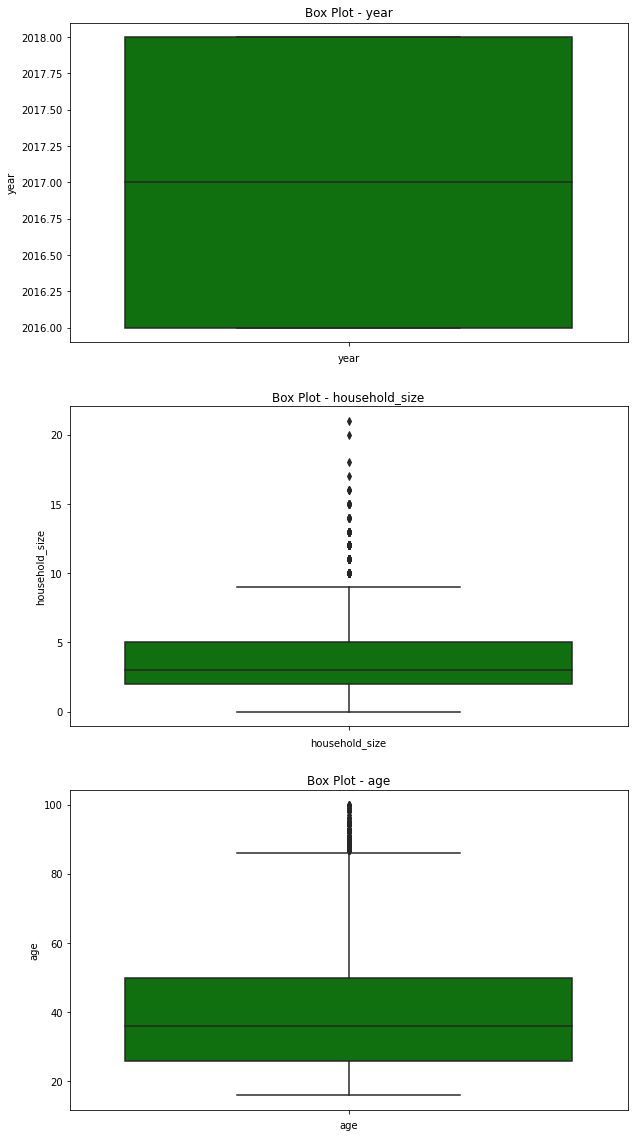

In [ ]:
# Checking for outliers
fig, ax = plt.subplots(len(numerical), figsize = (10,20))
for i, col_name in enumerate(numerical):
  sns.boxplot(y = financial_inclusion[col_name], ax = ax[i], color = 'green')
  ax[i].set_title(f'Box Plot - {col_name}')
  ax[i].set_xlabel(col_name)

plt.show()

Both columns have missing values.

Removing outliers to minimize skew.

In [ ]:
# New dataset
financial_inclusion_cleaned = financial_inclusion.copy()
test_data_cleaned = test_data.copy()

In [ ]:
# IQR

Q1 = financial_inclusion_cleaned[numerical].quantile(0.25)
Q3 = financial_inclusion_cleaned[numerical].quantile(0.75)
IQR = Q3 - Q1

Q1_2 = test_data_cleaned[numerical].quantile(0.25)
Q3_2 = test_data_cleaned[numerical].quantile(0.75)
IQR2 = Q3_2 - Q1_2

financial_inclusion_cleaned = financial_inclusion_cleaned[~((financial_inclusion_cleaned[numerical] < (Q1 - 1.5 * IQR)) |(financial_inclusion_cleaned[numerical] > (Q3 + 1.5 * IQR))).any(axis=1)]
test_data_cleaned = test_data_cleaned[~((test_data_cleaned[numerical] < (Q1_2 - 1.5 * IQR2)) |(test_data_cleaned[numerical] > (Q3_2 + 1.5 * IQR2))).any(axis=1)]

In [ ]:
# Confirming changes
outliers = financial_inclusion.shape[0] - financial_inclusion_cleaned.shape[0]
print(f'Outliers removed = {outliers}')


Outliers removed = 503


In [ ]:
# Confirming changes
outliers = test_data.shape[0] - test_data.shape[0]
print(f'Outliers removed = {outliers}')

Outliers removed = 0
